##                        ------------------- _Interview Intelligence System_ ------------------

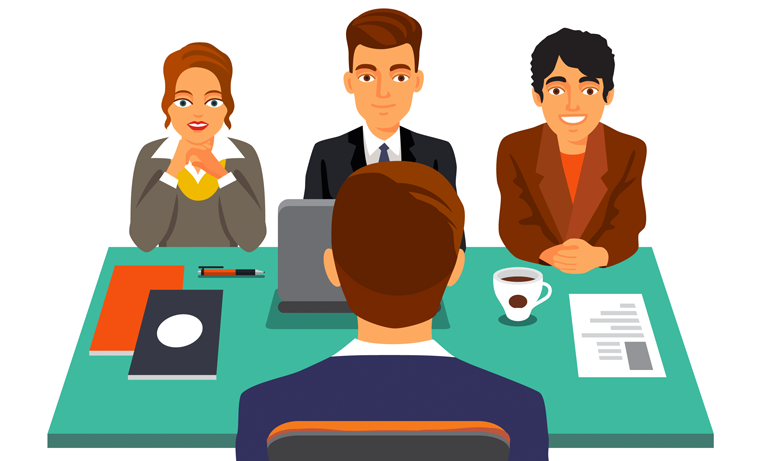

### Pre-Processing of data

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
df1 = pd.read_excel(r"C:\Users\Sahil\Downloads\interview_train.xlsx",header = 0,index_col=0)
df2 = pd.read_excel(r"C:\Users\Sahil\Downloads\interview_test.xlsx",header = 0,index_col=0)

#### df1 = Train Data
#### df2 = Test Data

In [3]:
df1.head()

Candidate Id  Interviewer Id          Profile  S.L.R.C  S.L.R.I  \
Interview Id                                                                    
6.913030e+11  2.655774e+09             194        Developer     0.98     0.02   
9.214326e+11  7.123846e+08             234            Sales     0.67     0.33   
4.718839e+10  8.445533e+08             267  Program Manager     0.81     0.19   
9.943741e+11  6.511106e+09             199        Marketing     0.69     0.31   
3.509007e+11  3.487001e+09             221    QA Automation     0.57     0.43   

              A.T.T  L.M.I  L.M.C  S.R  L.J.T.C  L.J.T.I  N.I.C  N.I.I  S.P.I  \
Interview Id                                                                    
6.913030e+11     53     88     93   32       88      106     41     66     42   
9.214326e+11     51     53     44   36       93      313     28     62     32   
4.718839e+10     60     77     75   54       52       67     26     14     57   
9.943741e+11     93     42    103   49      115      166     62     55     65   
3.509007e+11     44     44    119   66      190      394      7     32     36   

              S.P.C  L.A.C  L.A.I  Q.A     P.E.I     P.E.C  COMPLIANCE Ratio  \
Interview Id                                                                   
6.913030e+11     47     13     15    6   Neutral   Neutral                98   
9.214326e+11     52      5     15    4   Neutral  Negative                54   
4.718839e+10     34      4      7    3  Positive  Positive                31   
9.943741e+11     75     10     10    7  Positive  Negative                24   
3.509007e+11     74     13      7    3  Negative  Positive                73   

              Interview duration Interviewer Intro Candidate into Opp to ask  \
Interview Id                                                                   
6.913030e+11                  37                No            Yes        Yes   
9.214326e+11                  33                No             No        Yes   
4.718839e+10                  58                No            Yes         No   
9.943741e+11                  35                No            Yes         No   
3.509007e+11                  60               Yes            Yes         No   

                Status  
Interview Id            
6.913030e+11  Consider  
9.214326e+11  Consider  
4.718839e+10  Consider  
9.943741e+11  Consider  
3.509007e+11  Consider

In [4]:
df2.head()

Candidate Id  Interviewer Id          Profile  S.L.R.C  S.L.R.I  \
Interview Id                                                                    
702127796635  2.381365e+09             229  Product Manager     0.52     0.48   
613490569071  8.428514e+08             194  Product Manager     0.87     0.13   
759998772623  7.681665e+09             266    QA Automation     0.60     0.40   
391760082113  6.627808e+09             256               HR     0.52     0.48   
941599210196  1.148634e+09             267               HR     0.59     0.41   

              A.T.T  L.M.I  L.M.C  S.R  L.J.T.C  L.J.T.I  N.I.C  N.I.I  S.P.I  \
Interview Id                                                                    
702127796635    103     53     77   30     26.0      287      8     22   69.0   
613490569071     54     57     57   68    179.0      253     62     40   47.0   
759998772623     50    117     93   36    137.0       31     40     52   57.0   
391760082113    102    114     66   31    176.0      242     69     66   59.0   
941599210196     96     73    115   23    218.0      215     69     42   74.0   

              S.P.C  L.A.C  L.A.I  Q.A     P.E.I     P.E.C  COMPLIANCE Ratio  \
Interview Id                                                                   
702127796635     88      5   19.0  4.0  Positive  Negative              24.0   
613490569071     81      1    9.0  7.0  Positive   Neutral              99.0   
759998772623     13      7   15.0  3.0  Negative  Positive              16.0   
391760082113     10     10    4.0  6.0  Negative   Neutral              66.0   
941599210196     20     10    4.0  6.0  Positive  Positive              47.0   

              Interview duration Interviewer Intro Candidate into Opp to ask  
Interview Id                                                                  
702127796635                  49               Yes            Yes        Yes  
613490569071                  24                No            Yes        Yes  
759998772623                  16               Yes             No        Yes  
391760082113                  40                No             No        Yes  
941599210196                  38                No            Yes        Yes

In [5]:
df1.shape

(5800, 26)

In [6]:
df2.shape

(1200, 25)

In [7]:
df1.describe()

Candidate Id  Interviewer Id      S.L.R.C      S.L.R.I        A.T.T  \
count  5.800000e+03     5800.000000  5800.000000  5800.000000  5800.000000   
mean   5.009458e+09      229.553448     0.748321     0.251679    69.927414   
std    2.873886e+09       22.884836     0.144272     0.144272    29.464030   
min    1.467066e+05      190.000000     0.500000     0.010000    20.000000   
25%    2.513537e+09      210.000000     0.620000     0.130000    44.000000   
50%    5.009811e+09      229.000000     0.750000     0.250000    70.000000   
75%    7.468382e+09      250.000000     0.870000     0.380000    96.000000   
max    9.999362e+09      268.000000     0.990000     0.500000   120.000000   

             L.M.I        L.M.C          S.R      L.J.T.C      L.J.T.I  \
count  5800.000000  5800.000000  5800.000000  5800.000000  5800.000000   
mean     80.445172    80.084310    45.077414   150.231207   301.063103   
std      23.450059    23.540515    14.729066    87.265858   172.861851   
min      40.000000    40.000000    20.000000     0.000000     0.000000   
25%      60.000000    59.000000    32.000000    74.000000   153.000000   
50%      81.000000    81.000000    45.000000   150.000000   300.000000   
75%     101.000000   101.000000    58.000000   226.000000   451.000000   
max     120.000000   120.000000    70.000000   300.000000   600.000000   

             N.I.C        N.I.I        S.P.I        S.P.C        L.A.C  \
count  5800.000000  5800.000000  5800.000000  5800.000000  5800.000000   
mean     37.709828    37.378448    55.175862    47.250690     8.019655   
std      19.042870    19.138247    20.373655    24.891818     4.311379   
min       5.000000     5.000000    20.000000     5.000000     1.000000   
25%      21.000000    21.000000    38.000000    26.000000     4.000000   
50%      38.000000    37.000000    55.000000    46.000000     8.000000   
75%      54.000000    54.000000    73.000000    69.000000    12.000000   
max      70.000000    70.000000    90.000000    90.000000    15.000000   

             L.A.I          Q.A  COMPLIANCE Ratio  Interview duration  
count  5800.000000  5800.000000       5800.000000         5800.000000  
mean     10.503621     4.507586         50.315517           37.306724  
std       5.724640     1.690976         28.696299           13.298407  
min       1.000000     2.000000          0.000000           15.000000  
25%       6.000000     3.000000         25.000000           26.000000  
50%      10.000000     5.000000         51.000000           37.000000  
75%      15.000000     6.000000         75.000000           49.000000  
max      20.000000     7.000000        100.000000           60.000000

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5800 entries, 691302971928.0 to 863040675358.0
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Candidate Id        5800 non-null   float64
 1   Interviewer Id      5800 non-null   int64  
 2   Profile             5800 non-null   object 
 3   S.L.R.C             5800 non-null   float64
 4   S.L.R.I             5800 non-null   float64
 5   A.T.T               5800 non-null   int64  
 6   L.M.I               5800 non-null   int64  
 7   L.M.C               5800 non-null   int64  
 8   S.R                 5800 non-null   int64  
 9   L.J.T.C             5800 non-null   int64  
 10  L.J.T.I             5800 non-null   int64  
 11  N.I.C               5800 non-null   int64  
 12  N.I.I               5800 non-null   int64  
 13  S.P.I               5800 non-null   int64  
 14  S.P.C               5800 non-null   int64  
 15  L.A.C               5800 non-null   i

In [9]:
df1.duplicated().sum()

0

In [10]:
df2.duplicated().sum()

0

### Handling Missing Values:

In [11]:
df1.isnull().sum()

Candidate Id          0
Interviewer Id        0
Profile               0
S.L.R.C               0
S.L.R.I               0
A.T.T                 0
L.M.I                 0
L.M.C                 0
S.R                   0
L.J.T.C               0
L.J.T.I               0
N.I.C                 0
N.I.I                 0
S.P.I                 0
S.P.C                 0
L.A.C                 0
L.A.I                 0
Q.A                   0
P.E.I                 1
P.E.C                 3
COMPLIANCE Ratio      0
Interview duration    0
Interviewer Intro     1
Candidate into        0
Opp to ask            1
Status                4
dtype: int64

In [12]:
df2.isnull().sum()

Candidate Id          0
Interviewer Id        0
Profile               0
S.L.R.C               0
S.L.R.I               1
A.T.T                 0
L.M.I                 0
L.M.C                 0
S.R                   0
L.J.T.C               1
L.J.T.I               0
N.I.C                 0
N.I.I                 0
S.P.I                 2
S.P.C                 0
L.A.C                 0
L.A.I                 1
Q.A                   1
P.E.I                 2
P.E.C                 2
COMPLIANCE Ratio      1
Interview duration    0
Interviewer Intro     2
Candidate into        0
Opp to ask            0
dtype: int64

In [13]:
for value in ['S.L.R.I','L.J.T.C','S.P.I','L.A.I','Q.A','P.E.I','P.E.C','COMPLIANCE Ratio','Interviewer Intro','Opp to ask','Status']:
    df1[value].fillna(df1[value].mode()[0],inplace=True) 

In [14]:
df1.isnull().sum()

Candidate Id          0
Interviewer Id        0
Profile               0
S.L.R.C               0
S.L.R.I               0
A.T.T                 0
L.M.I                 0
L.M.C                 0
S.R                   0
L.J.T.C               0
L.J.T.I               0
N.I.C                 0
N.I.I                 0
S.P.I                 0
S.P.C                 0
L.A.C                 0
L.A.I                 0
Q.A                   0
P.E.I                 0
P.E.C                 0
COMPLIANCE Ratio      0
Interview duration    0
Interviewer Intro     0
Candidate into        0
Opp to ask            0
Status                0
dtype: int64

In [15]:
for value in ['S.L.R.I','L.J.T.C','S.P.I','L.A.I','Q.A','P.E.I','P.E.C','COMPLIANCE Ratio','Interviewer Intro','Opp to ask']:
    df2[value].fillna(df2[value].mode()[0],inplace=True) 

In [16]:
df2.isnull().sum()

Candidate Id          0
Interviewer Id        0
Profile               0
S.L.R.C               0
S.L.R.I               0
A.T.T                 0
L.M.I                 0
L.M.C                 0
S.R                   0
L.J.T.C               0
L.J.T.I               0
N.I.C                 0
N.I.I                 0
S.P.I                 0
S.P.C                 0
L.A.C                 0
L.A.I                 0
Q.A                   0
P.E.I                 0
P.E.C                 0
COMPLIANCE Ratio      0
Interview duration    0
Interviewer Intro     0
Candidate into        0
Opp to ask            0
dtype: int64

### Checking for unique values:

In [17]:
for i in df1.columns:
    print({i:df1[i].unique()})

{'Candidate Id': array([2.65577413e+09, 7.12384596e+08, 8.44553340e+08, ...,
       4.65757441e+09, 8.11856487e+08, 3.49463343e+09])}
{'Interviewer Id': array([194, 234, 267, 199, 221, 246, 228, 197, 250, 213, 266, 190, 208,
       257, 247, 253, 214, 258, 255, 254, 265, 262, 233, 249, 268, 224,
       203, 226, 201, 256, 261, 243, 196, 212, 198, 236, 216, 263, 259,
       206, 210, 192, 195, 218, 244, 252, 205, 202, 264, 241, 235, 215,
       191, 229, 219, 204, 242, 217, 248, 220, 232, 240, 238, 237, 239,
       225, 231, 207, 209, 260, 193, 251, 230, 222, 227, 211, 245, 223,
       200], dtype=int64)}
{'Profile': array(['Developer', 'Sales', 'Program Manager', 'Marketing',
       'QA Automation', 'Account Manager', 'Data Scientist',
       'Product Manager', 'QA Manual', 'HR'], dtype=object)}
{'S.L.R.C': array([0.98, 0.67, 0.81, 0.69, 0.57, 0.65, 0.52, 0.91, 0.72, 0.82, 0.66,
       0.51, 0.97, 0.54, 0.55, 0.5 , 0.79, 0.83, 0.73, 0.63, 0.62, 0.88,
       0.8 , 0.99, 0.68, 0.85, 0.84

### Data Transformation:

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
colname = []
for x in df1.columns:
    if df1[x].dtypes=='object':
        colname.append(x)
colname

['Profile',
 'P.E.I',
 'P.E.C',
 'Interviewer Intro',
 'Candidate into',
 'Opp to ask',
 'Status']

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in colname:
    df1[x] = le.fit_transform(df1[x])

In [21]:
col = []
for x in df2.columns:
    if df2[x].dtypes=='object':
        col.append(x)
col

['Profile',
 'P.E.I',
 'P.E.C',
 'Interviewer Intro',
 'Candidate into',
 'Opp to ask']

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in col:
    df2[x] = le.fit_transform(df2[x])

In [23]:
df1.Status.replace({'Consider':0,'May Consider':1,'Not Consider':2},inplace=True)

___________________________
## Graphical Analysis:

### Pie Chart

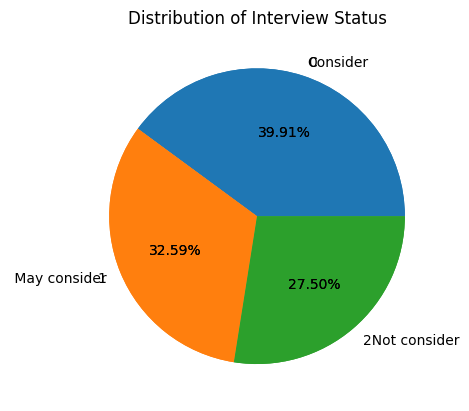

In [24]:
import matplotlib.pyplot as plt

df1.Status.value_counts().plot(kind="pie",autopct="%.2f%%");
plt.ylabel(" ");

# Get value counts for the Status column
status_counts = df1.Status.value_counts()

# Define custom labels
labels = ['Consider',' May consider','  Not consider']  # Replace these with your desired labels if different

# Plotting the pie chart
status_counts.plot(kind="pie", autopct="%.2f%%", labels=labels)
plt.ylabel(" ")  # Optional: remove the y-label for clarity
plt.title("Distribution of Interview Status")  # Optional: add a title
plt.show()


### Correlation Heatmap: Relationships between Numeric Features

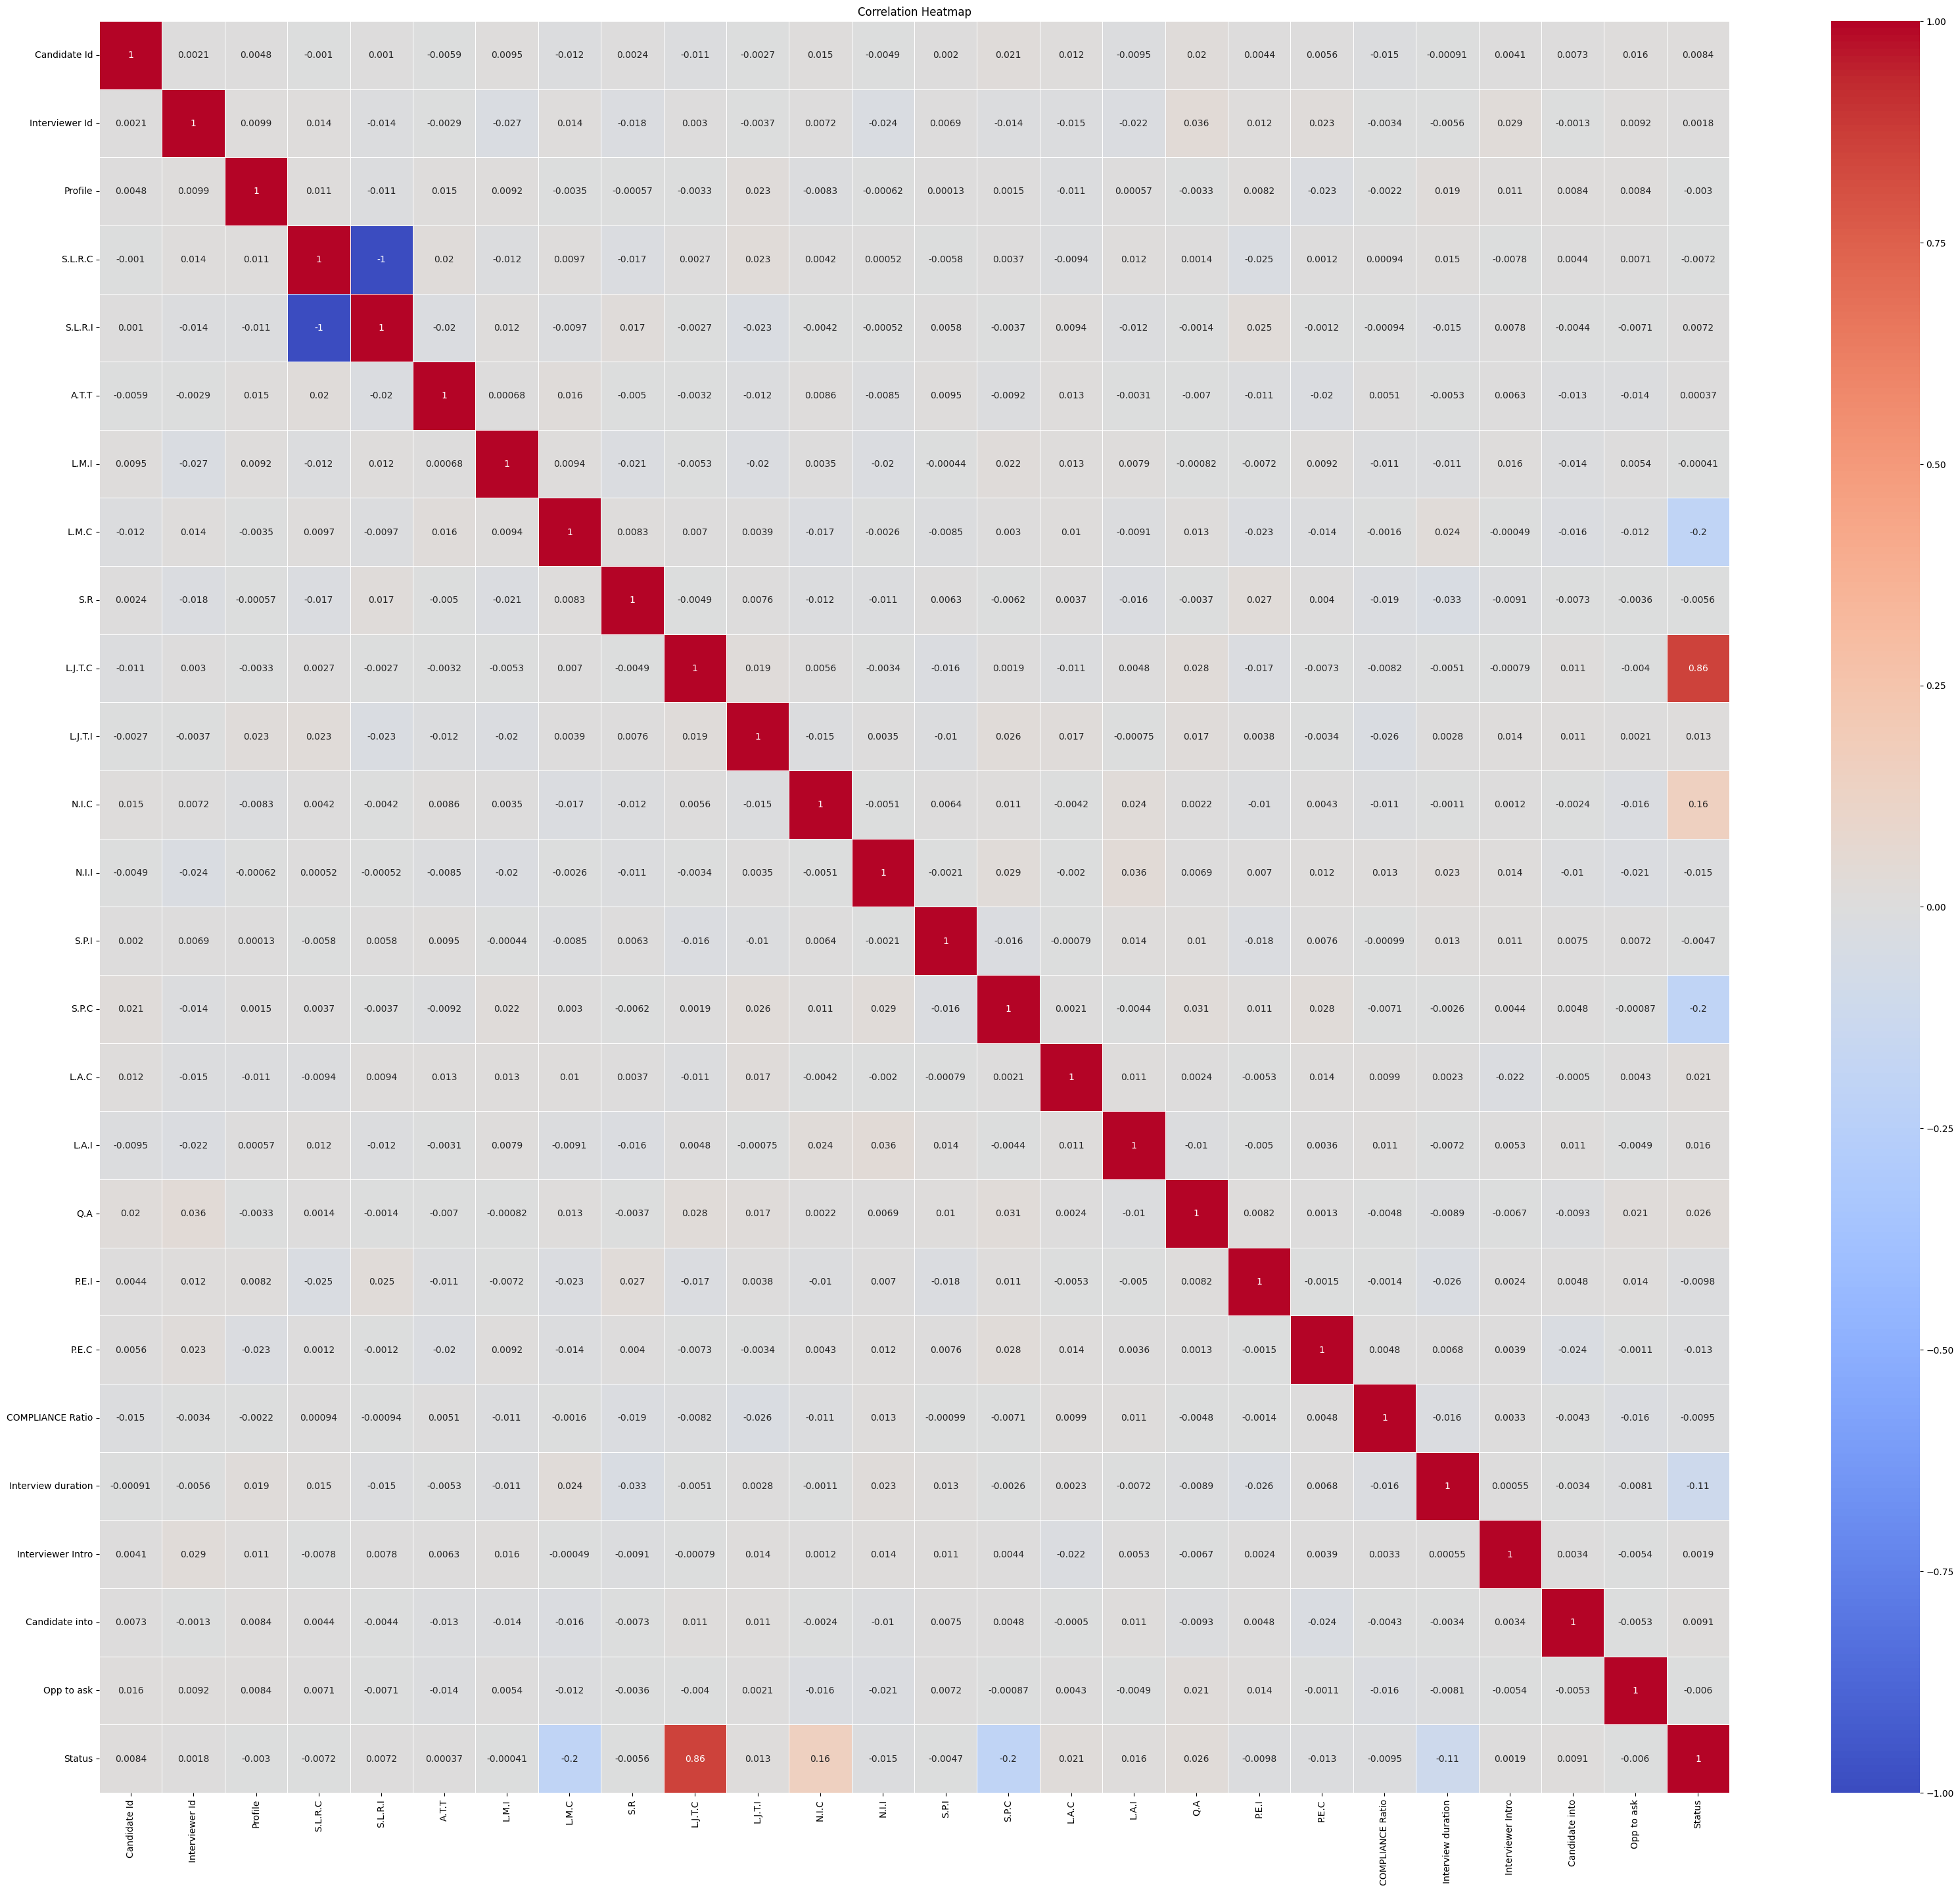

In [25]:
import seaborn as sns 
import numpy as np

# Correlation heatmap
plt.figure(figsize=(40,35))
correlation = df1.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Correlation values range from -1 to 1.  
1 indicates a perfect positive correlation.  
-1 indicates a perfect negative correlation.  
0 indicates no correlation.

### Profile wise count distribution

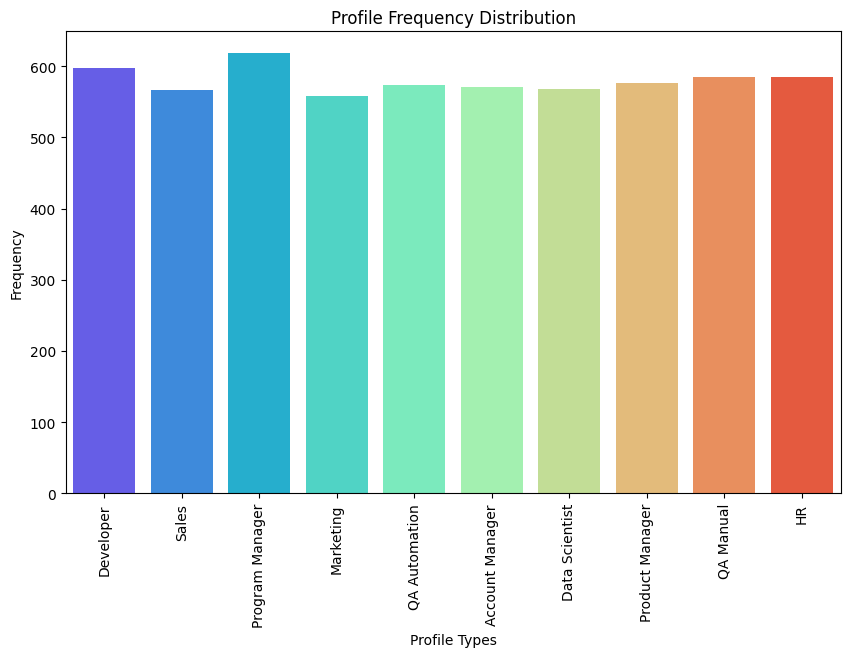

In [26]:
#countplot are useful to visualize the frequency distribution of a single discrete/categorical variable

import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Profile', data=df1, palette="rainbow")

# Define custom profile names for each bar on the x-axis
custom_profile_names = ['Developer', 'Sales', 'Program Manager', 'Marketing',
       'QA Automation', 'Account Manager', 'Data Scientist',
       'Product Manager', 'QA Manual', 'HR'] 

# Add x-axis label
plt.xlabel('Profile Types')

# Add y-axis label
plt.ylabel('Frequency')

# Set custom x-axis tick labels
ax.set_xticklabels(custom_profile_names, rotation=90)

# Add title
plt.title('Profile Frequency Distribution')

# Show the plot
plt.show()

#### The count plot quickly shows which profiles appear most or least frequently in the dataset.   
#### This helps identify dominant profiles and can guide  3  analysis or decision-making, such as focusing efforts on the most common profiles in your dataset

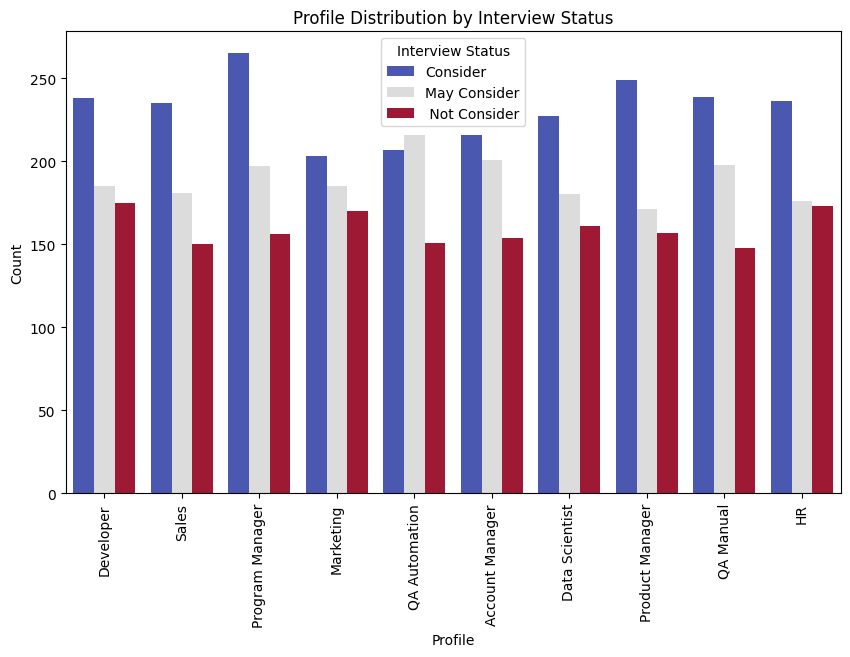

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the mapping for Status: 0 -> Consider, 1 -> May Consider, 2 -> not Consider
status_mapping = {0: 'Consider', 1: 'May Consider', 2: ' Not Consider'}

# Bar plot for Profile distribution by Interview Status
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Profile', hue='Status', data=df1, palette='coolwarm')


handles, labels = ax.get_legend_handles_labels()  # Get existing legend handles and labels
ax.legend(handles, [status_mapping[int(l)] for l in labels], title="Interview Status")  # Replace labels

# Custom x-axis labels
custom_x_labels = ['Developer', 'Sales', 'Program Manager', 'Marketing',
       'QA Automation', 'Account Manager', 'Data Scientist',
       'Product Manager', 'QA Manual', 'HR']  # Replace with actual names
ax.set_xticklabels(custom_x_labels, rotation=90)

plt.title('Profile Distribution by Interview Status')
plt.xlabel('Profile')
plt.ylabel('Count')
plt.show()


### Sunburst

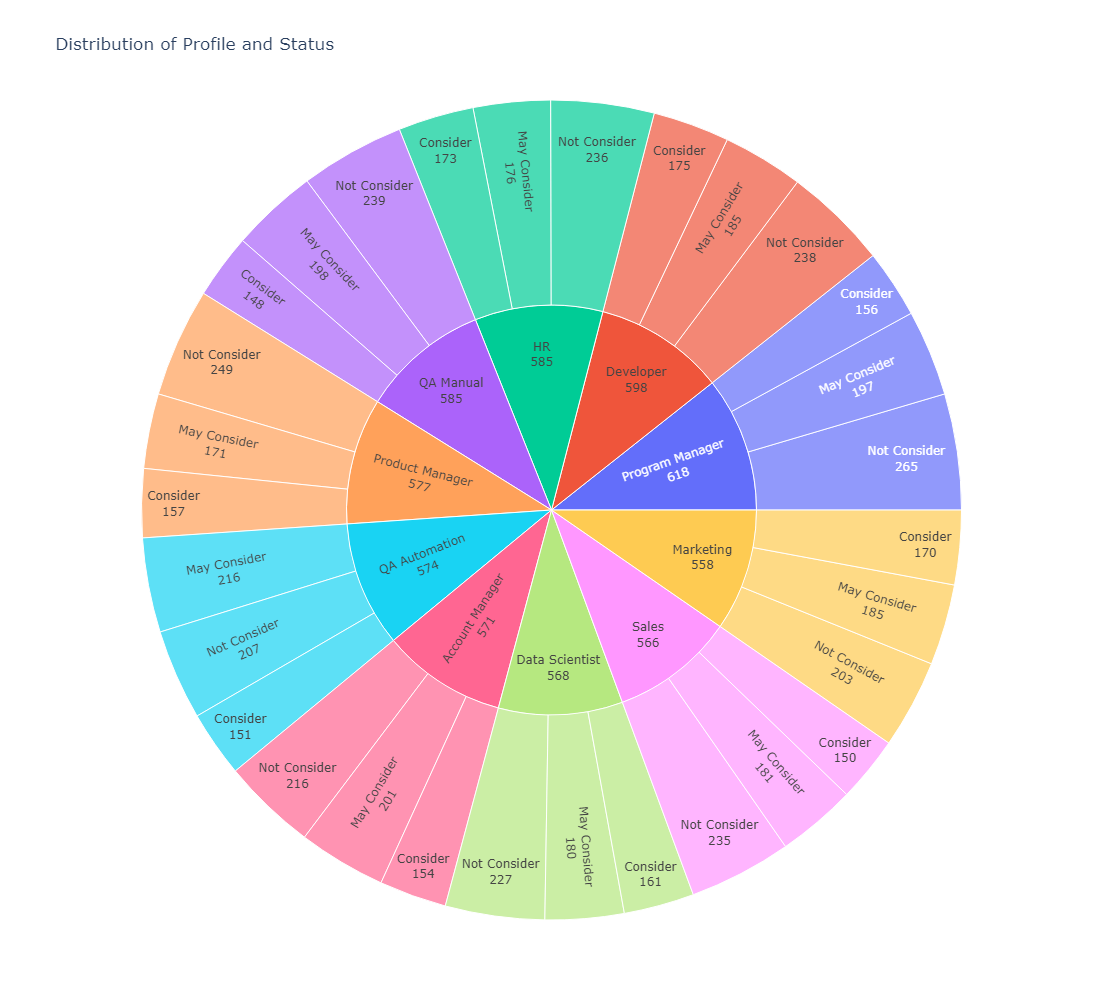

In [28]:
import pandas as pd
import plotly.express as px


# Prepare data for sunburst
status_counts = df1.groupby(['Profile', 'Status']).size().reset_index(name='Count')

# Define a mapping for the label-encoded profiles to their names
profile_mapping = {
    0: 'Developer',
    1: 'Sales',
    2: 'Program Manager',
    3: 'Marketing',
    4: 'QA Automation',
    5: 'Account Manager',
    6: 'Data Scientist',
    7: 'Product Manager',
    8: 'QA Manual',
    9: 'HR'
}

# Replace encoded profile values with their corresponding names
status_counts['Profile'] = status_counts['Profile'].map(profile_mapping)

# Define custom labels for status
status_mapping = {
    0: 'Not Consider', 
    1: 'May Consider', 
    2: 'Consider'
}

# Create a new column for status labels
status_counts['Status Label'] = status_counts['Status'].map(status_mapping)

# Create a sunburst chart
fig = px.sunburst(
    status_counts,
    path=['Profile', 'Status Label'],  # Use Profile and Status Label in the hierarchy
    values='Count',                     # Values to size the segments
    title='Distribution of Profile and Status',
    hover_data={'Profile': True, 'Status Label': True, 'Count': True}  # Show additional info on hover
)

# Update layout for legend and labels
fig.update_traces(textinfo='label+value')  # Show label and value in segments
fig.update_layout(legend_title_text='Consideration Status')  # Customize legend title




# Update layout for legend and labels
fig.update_traces(textinfo='label+value')  # Show label and value in segments
fig.update_layout(
    legend_title_text='Consideration Status',  # Customize legend title
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),  # Horizontal legend
    width=700,  # Increase width of the figure
    height=1000   # Increase height of the figure
)

# Show the figure
fig.show()

### Feature Selection
#### Eliminating 2 out of 3 unique ids, which are not relevant to predict the data, and shows high cardinality in the data.

In [29]:
df1.drop(['Candidate Id','Interviewer Id'],axis=1,inplace=True)

In [30]:
#df1.shape

In [31]:
df2.drop(['Candidate Id','Interviewer Id'],axis=1,inplace=True)

In [32]:
#df2.shape

In [33]:
df1.head()

Profile  S.L.R.C  S.L.R.I  A.T.T  L.M.I  L.M.C  S.R  L.J.T.C  \
Interview Id                                                                 
6.913030e+11        2     0.98     0.02     53     88     93   32       88   
9.214326e+11        9     0.67     0.33     51     53     44   36       93   
4.718839e+10        6     0.81     0.19     60     77     75   54       52   
9.943741e+11        4     0.69     0.31     93     42    103   49      115   
3.509007e+11        7     0.57     0.43     44     44    119   66      190   

              L.J.T.I  N.I.C  N.I.I  S.P.I  S.P.C  L.A.C  L.A.I  Q.A  P.E.I  \
Interview Id                                                                  
6.913030e+11      106     41     66     42     47     13     15    6      1   
9.214326e+11      313     28     62     32     52      5     15    4      1   
4.718839e+10       67     26     14     57     34      4      7    3      2   
9.943741e+11      166     62     55     65     75     10     10    7      2   
3.509007e+11      394      7     32     36     74     13      7    3      0   

              P.E.C  COMPLIANCE Ratio  Interview duration  Interviewer Intro  \
Interview Id                                                                   
6.913030e+11      1                98                  37                  0   
9.214326e+11      0                54                  33                  0   
4.718839e+10      2                31                  58                  0   
9.943741e+11      0                24                  35                  0   
3.509007e+11      2                73                  60                  1   

              Candidate into  Opp to ask  Status  
Interview Id                                      
6.913030e+11               1           1       0  
9.214326e+11               0           1       0  
4.718839e+10               1           0       0  
9.943741e+11               1           0       0  
3.509007e+11               1           0       0

In [34]:
df2.head()

Profile  S.L.R.C  S.L.R.I  A.T.T  L.M.I  L.M.C  S.R  L.J.T.C  \
Interview Id                                                                 
702127796635        5     0.52     0.48    103     53     77   30     26.0   
613490569071        5     0.87     0.13     54     57     57   68    179.0   
759998772623        7     0.60     0.40     50    117     93   36    137.0   
391760082113        3     0.52     0.48    102    114     66   31    176.0   
941599210196        3     0.59     0.41     96     73    115   23    218.0   

              L.J.T.I  N.I.C  N.I.I  S.P.I  S.P.C  L.A.C  L.A.I  Q.A  P.E.I  \
Interview Id                                                                  
702127796635      287      8     22   69.0     88      5   19.0  4.0      2   
613490569071      253     62     40   47.0     81      1    9.0  7.0      2   
759998772623       31     40     52   57.0     13      7   15.0  3.0      0   
391760082113      242     69     66   59.0     10     10    4.0  6.0      0   
941599210196      215     69     42   74.0     20     10    4.0  6.0      2   

              P.E.C  COMPLIANCE Ratio  Interview duration  Interviewer Intro  \
Interview Id                                                                   
702127796635      0              24.0                  49                  1   
613490569071      1              99.0                  24                  0   
759998772623      2              16.0                  16                  1   
391760082113      1              66.0                  40                  0   
941599210196      2              47.0                  38                  0   

              Candidate into  Opp to ask  
Interview Id                              
702127796635               1           1  
613490569071               1           1  
759998772623               0           1  
391760082113               0           1  
941599210196               1           1

In [35]:
# for x in colname:
#     df2[x] = le.fit_transform(df2[x])

In [36]:
df2.dtypes

Profile                 int32
S.L.R.C               float64
S.L.R.I               float64
A.T.T                   int64
L.M.I                   int64
L.M.C                   int64
S.R                     int64
L.J.T.C               float64
L.J.T.I                 int64
N.I.C                   int64
N.I.I                   int64
S.P.I                 float64
S.P.C                   int64
L.A.C                   int64
L.A.I                 float64
Q.A                   float64
P.E.I                   int32
P.E.C                   int32
COMPLIANCE Ratio      float64
Interview duration      int64
Interviewer Intro       int32
Candidate into          int32
Opp to ask              int32
dtype: object

### Distributing Independent and Dependent Variables in X and Y

In [37]:
X = df1.values[:,0:-1] 
Y = df1.values[:,-1]

In [38]:
X.shape

(5800, 23)

In [39]:
Y.shape

(5800,)

### Scaling the data

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X) 

[[-0.86110267  1.60599274 -1.60599274 ... -0.99587059  1.01249181
   0.98087255]
 [ 1.5635293  -0.54291623  0.54291623 ... -0.99587059 -0.98766231
   0.98087255]
 [ 0.52440131  0.42755879 -0.42755879 ... -0.99587059  1.01249181
  -1.01950044]
 ...
 [ 0.17802532 -0.75087517  0.75087517 ... -0.99587059  1.01249181
  -1.01950044]
 [ 1.5635293   1.32871416 -1.32871416 ...  1.00414653  1.01249181
   0.98087255]
 [-0.86110267  0.56619807 -0.56619807 ... -0.99587059 -0.98766231
  -1.01950044]]


### Spliting the data

In [41]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=10,stratify = Y)

In [42]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4060, 23)
(4060,)
(1740, 23)
(1740,)


In [43]:
df1.Status.value_counts()

Status
0    2315
1    1890
2    1595
Name: count, dtype: int64

#### As we can notice that more data is distributed in class 0 (consider) and less is allocated to class 2, hence in order to balance the data we apply Smote.

### SMOTE

In [44]:
print("Before OverSampling, counts of label '2': ", (sum(Y_train == 2)))
print("Before OverSampling, counts of label '1': ", (sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': ", (sum(Y_train == 0)))
  
# import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10,k_neighbors=5)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)
  
print('After OverSampling, the shape of train_X: ', (X_train_res.shape))
print('After OverSampling, the shape of train_y: ', (Y_train_res.shape))

print("After OverSampling, counts of label '2': ", (sum(Y_train_res == 2)))  
print("After OverSampling, counts of label '1': ", (sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': ", (sum(Y_train_res == 0)))

Before OverSampling, counts of label '2':  1116
Before OverSampling, counts of label '1':  1323
Before OverSampling, counts of label '0':  1621
After OverSampling, the shape of train_X:  (4863, 23)
After OverSampling, the shape of train_y:  (4863,)
After OverSampling, counts of label '2':  1621
After OverSampling, counts of label '1':  1621
After OverSampling, counts of label '0':  1621


### Model 1 : Decision Tree

In [45]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier(random_state=10, 
                                  criterion = 'gini',
                                  splitter='best',
                                  min_samples_leaf=3, 
                                  min_samples_split=5,
                                  max_depth=10, 
                                  max_leaf_nodes=100)
model_DT.fit(X_train_res,Y_train_res)
Y_pred=model_DT.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[627  66   1]
 [ 53 452  62]
 [  0  40 439]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91       694
         1.0       0.81      0.80      0.80       567
         2.0       0.87      0.92      0.90       479

    accuracy                           0.87      1740
   macro avg       0.87      0.87      0.87      1740
weighted avg       0.87      0.87      0.87      1740

Accuracy of the model:  0.8724137931034482


In [47]:
model_DT.score(X_train,Y_train)

0.9399014778325123

### Model 2 : Random Forest

In [48]:
#predicting using the Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier
 
model_RandomForest=RandomForestClassifier(n_estimators=500,
                                          random_state=10, bootstrap=True,
                                         n_jobs=-1)
 
#fit the model on the data and predict the values
model_RandomForest.fit(X_train_res,Y_train_res)
 
Y_pred=model_RandomForest.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[643  50   1]
 [ 58 473  36]
 [  0  34 445]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92       694
         1.0       0.85      0.83      0.84       567
         2.0       0.92      0.93      0.93       479

    accuracy                           0.90      1740
   macro avg       0.90      0.90      0.90      1740
weighted avg       0.90      0.90      0.90      1740

Accuracy of the model:  0.8971264367816092


In [50]:
model_RandomForest.score(X_train,Y_train)

1.0

### Model 3: XG Boosting

In [51]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier

# Create a Random Forest Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Define the parameter grid
param_grid = {
    'n_estimators': [200],
    'max_depth': [3],
    'learning_rate': [0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8]}

# Set up Grid Search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit Grid Search
grid_search.fit(X_train_res, Y_train_res)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the best model
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

print("Accuracy on test set: ", accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Accuracy on test set:  0.9517241379310345
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       694
         1.0       0.92      0.93      0.93       567
         2.0       0.95      0.96      0.96       479

    accuracy                           0.95      1740
   macro avg       0.95      0.95      0.95      1740
weighted avg       0.95      0.95      0.95      1740



In [52]:
grid_search.score(X_train,Y_train)

0.9997536945812808

### Model 4: Support Vector Classifier

In [53]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
# Create a SVM model
svm_model = SVC()

# Set the parameters for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel types
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train_res, Y_train_res)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Make predictions with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

print("\nClassification Report:")
print(classification_report(Y_test, y_pred))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Score: 0.9938316013855584

Confusion Matrix:
[[691   2   1]
 [  4 561   2]
 [  2   1 476]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       694
         1.0       0.99      0.99      0.99       567
         2.0       0.99      0.99      0.99       479

    accuracy                           0.99      1740
   macro avg       0.99      0.99      0.99      1740
weighted avg       0.99      0.99      0.99      1740



In [54]:
grid_search.score(X_train,Y_train)

0.9963054187192119

### A Breif Comparision of each model

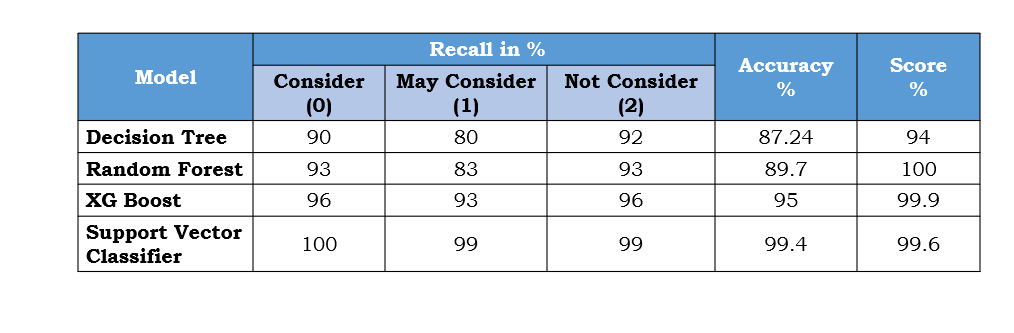

In [55]:
X = scaler.transform(df2)
print(X)

[[ 0.17802532 -1.5827109   1.5827109  ...  1.00414653  1.01249181
   0.98087255]
 [ 0.17802532  0.84347665 -0.84347665 ... -0.99587059  1.01249181
   0.98087255]
 [ 0.87077731 -1.02815374  1.02815374 ...  1.00414653 -0.98766231
   0.98087255]
 ...
 [-0.51472667 -0.12699837  0.12699837 ...  1.00414653  1.01249181
  -1.01950044]
 [-0.86110267  1.39803381 -1.39803381 ... -0.99587059 -0.98766231
  -1.01950044]
 [ 1.5635293   1.53667309 -1.53667309 ... -0.99587059 -0.98766231
   0.98087255]]


## Predicting the model

In [56]:
Y_pred_test= grid_search.predict(X)

In [57]:
df2['Status'] = Y_pred_test

In [58]:
df2

Profile  S.L.R.C  S.L.R.I  A.T.T  L.M.I  L.M.C  S.R  L.J.T.C  \
Interview Id                                                                 
702127796635        5     0.52     0.48    103     53     77   30     26.0   
613490569071        5     0.87     0.13     54     57     57   68    179.0   
759998772623        7     0.60     0.40     50    117     93   36    137.0   
391760082113        3     0.52     0.48    102    114     66   31    176.0   
941599210196        3     0.59     0.41     96     73    115   23    218.0   
...               ...      ...      ...    ...    ...    ...  ...      ...   
256033687434        4     0.66     0.34     95    118     79   65    294.0   
627337316047        1     0.66     0.34     42     47    107   57     54.0   
75547031851         3     0.73     0.27     72    105     78   55    247.0   
173914777164        2     0.95     0.05     42     45     68   60     97.0   
480519602140        9     0.97     0.03    116     48    118   28    197.0   

              L.J.T.I  N.I.C  N.I.I  S.P.I  S.P.C  L.A.C  L.A.I  Q.A  P.E.I  \
Interview Id                                                                  
702127796635      287      8     22   69.0     88      5   19.0  4.0      2   
613490569071      253     62     40   47.0     81      1    9.0  7.0      2   
759998772623       31     40     52   57.0     13      7   15.0  3.0      0   
391760082113      242     69     66   59.0     10     10    4.0  6.0      0   
941599210196      215     69     42   74.0     20     10    4.0  6.0      2   
...               ...    ...    ...    ...    ...    ...    ...  ...    ...   
256033687434      110     61     29   30.0     85     15   20.0  7.0      2   
627337316047      140     35     33   51.0     76      8   18.0  2.0      2   
75547031851       158     30     39   27.0      6      1   18.0  3.0      0   
173914777164      327     65     42   88.0     63      1    9.0  7.0      2   
480519602140      414     25     42   32.0     17      8    2.0  6.0      2   

              P.E.C  COMPLIANCE Ratio  Interview duration  Interviewer Intro  \
Interview Id                                                                   
702127796635      0              24.0                  49                  1   
613490569071      1              99.0                  24                  0   
759998772623      2              16.0                  16                  1   
391760082113      1              66.0                  40                  0   
941599210196      2              47.0                  38                  0   
...             ...               ...                 ...                ...   
256033687434      0              86.0                  49                  1   
627337316047      0              32.0                  32                  0   
75547031851       0              34.0                  19                  1   
173914777164      0              78.0                  23                  0   
480519602140      2              86.0                  60                  0   

              Candidate into  Opp to ask  Status  
Interview Id                                      
702127796635               1           1     0.0  
613490569071               1           1     1.0  
759998772623               0           1     1.0  
391760082113               0           1     2.0  
941599210196               1           1     2.0  
...                      ...         ...     ...  
256033687434               1           0     2.0  
627337316047               1           0     0.0  
75547031851                1           0     2.0  
173914777164               0           0     1.0  
480519602140               0           1     1.0  

[1200 rows x 24 columns]

### Re-transforming the variable Y

In [59]:
df2['Status'] = df2.Status.replace({0:'Consider',1:'May Consider',2:'Not Consider'})

In [60]:
df2.head()

Profile  S.L.R.C  S.L.R.I  A.T.T  L.M.I  L.M.C  S.R  L.J.T.C  \
Interview Id                                                                 
702127796635        5     0.52     0.48    103     53     77   30     26.0   
613490569071        5     0.87     0.13     54     57     57   68    179.0   
759998772623        7     0.60     0.40     50    117     93   36    137.0   
391760082113        3     0.52     0.48    102    114     66   31    176.0   
941599210196        3     0.59     0.41     96     73    115   23    218.0   

              L.J.T.I  N.I.C  N.I.I  S.P.I  S.P.C  L.A.C  L.A.I  Q.A  P.E.I  \
Interview Id                                                                  
702127796635      287      8     22   69.0     88      5   19.0  4.0      2   
613490569071      253     62     40   47.0     81      1    9.0  7.0      2   
759998772623       31     40     52   57.0     13      7   15.0  3.0      0   
391760082113      242     69     66   59.0     10     10    4.0  6.0      0   
941599210196      215     69     42   74.0     20     10    4.0  6.0      2   

              P.E.C  COMPLIANCE Ratio  Interview duration  Interviewer Intro  \
Interview Id                                                                   
702127796635      0              24.0                  49                  1   
613490569071      1              99.0                  24                  0   
759998772623      2              16.0                  16                  1   
391760082113      1              66.0                  40                  0   
941599210196      2              47.0                  38                  0   

              Candidate into  Opp to ask        Status  
Interview Id                                            
702127796635               1           1      Consider  
613490569071               1           1  May Consider  
759998772623               0           1  May Consider  
391760082113               0           1  Not Consider  
941599210196               1           1  Not Consider

In [61]:
df2.Status.value_counts()

Status
Consider        491
May Consider    401
Not Consider    308
Name: count, dtype: int64

## _Conclusion:_
- The data indicates a relatively high number of candidates being actively considered for the job, with 491 individuals qualifying for consideration.  
- An additional 401 candidates fall into the "may consider" category, suggesting that they possess some qualifications but may require further evaluation.   
- However, 308 candidates have been marked as "not considered," indicating they do not meet the necessary criteria for the role.

### Analysis or Insights
- There were more job available for Program managers and least for Marketing department.  
- People were majorly considered for the program manager role comparing with other profiles.
- Candidates were majorly rejected under the Developer profile, whereas sales had the least proportion for rejection of candidates.
- Candidates were not selected but still kept in pool or kept on hold majorly for the Automation profile.

### Prescriptive Analysis
- From the above insights we can conclude that there are large no of candidates for the profile of Automation, so the client can either increase the no of teams or increase the number of project if necessary.
- To avoid much rejections the sorting of applicant can be done by a better approach like:  
  *~* Summarizing the Job Description including the required skillset alone with the roles and responsibilities.  
  *~* Conducting an assessment round for technical profiles or where some skillset are mandatory.  
This will help us to even effectively manage and utilize the HR's time.

----------------------------